# Import Libraries


In [80]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt # Visualization
import matplotlib.dates as mdates # Formatting dates
import seaborn as sns # Visualization
from sklearn.preprocessing import MinMaxScaler
import torch # Library for implementing Deep Neural Network
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader


# Load and Preprocess Dataset

In [81]:
df = pd.read_csv('Biotech_preprocessed_dataset.csv')
df

,Time,TOD,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday
0,2024-01-04 15:00:00,15:00:00,821.0,207.0,467.0,147.0,False,False,False,False,True,False,False,False
1,2024-01-04 16:00:00,16:00:00,741.0,298.0,329.0,114.0,False,False,False,False,True,False,False,False
2,2024-01-04 17:00:00,17:00:00,776.0,363.0,278.0,135.0,False,False,False,False,True,False,False,False
3,2024-01-04 18:00:00,18:00:00,1260.0,659.0,419.0,182.0,False,False,False,False,True,False,False,False
4,2024-01-04 19:00:00,19:00:00,973.0,381.0,410.0,182.0,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,2024-07-08 05:00:00,05:00:00,1040.0,635.0,259.0,146.0,False,True,False,False,False,False,False,False
4455,2024-07-08 06:00:00,06:00:00,1414.0,1023.0,251.0,140.0,False,True,False,False,False,False,False,False
4456,2024-07-08 07:00:00,07:00:00,571.0,225.0,243.0,103.0,False,True,False,False,False,False,False,False
4457,2024-07-08 08:00:00,08:00:00,784.0,411.0,280.0,93.0,False,True,False,False,False,False,False,False


In [82]:
df['Time'] = pd.to_datetime(df['Time'])
df['TOD'] = df['Time'].dt.hour
df['office_day'] = ~df['Holiday']
df

,Time,TOD,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday,office_day
0,2024-01-04 15:00:00,15,821.0,207.0,467.0,147.0,False,False,False,False,True,False,False,False,True
1,2024-01-04 16:00:00,16,741.0,298.0,329.0,114.0,False,False,False,False,True,False,False,False,True
2,2024-01-04 17:00:00,17,776.0,363.0,278.0,135.0,False,False,False,False,True,False,False,False,True
3,2024-01-04 18:00:00,18,1260.0,659.0,419.0,182.0,False,False,False,False,True,False,False,False,True
4,2024-01-04 19:00:00,19,973.0,381.0,410.0,182.0,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4454,2024-07-08 05:00:00,5,1040.0,635.0,259.0,146.0,False,True,False,False,False,False,False,False,True
4455,2024-07-08 06:00:00,6,1414.0,1023.0,251.0,140.0,False,True,False,False,False,False,False,False,True
4456,2024-07-08 07:00:00,7,571.0,225.0,243.0,103.0,False,True,False,False,False,False,False,False,True
4457,2024-07-08 08:00:00,8,784.0,411.0,280.0,93.0,False,True,False,False,False,False,False,False,True


In [83]:
df.index = df['Time']
df.head()

,Time,TOD,Total (W),Phase_A (W),Phase_B (W),Phase_C (W),Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Holiday,office_day
Time,,,,,,,,,,,,,,,
2024-01-04 15:00:00,2024-01-04 15:00:00,15,821.0,207.0,467.0,147.0,False,False,False,False,True,False,False,False,True
2024-01-04 16:00:00,2024-01-04 16:00:00,16,741.0,298.0,329.0,114.0,False,False,False,False,True,False,False,False,True
2024-01-04 17:00:00,2024-01-04 17:00:00,17,776.0,363.0,278.0,135.0,False,False,False,False,True,False,False,False,True
2024-01-04 18:00:00,2024-01-04 18:00:00,18,1260.0,659.0,419.0,182.0,False,False,False,False,True,False,False,False,True
2024-01-04 19:00:00,2024-01-04 19:00:00,19,973.0,381.0,410.0,182.0,False,False,False,False,True,False,False,False,True


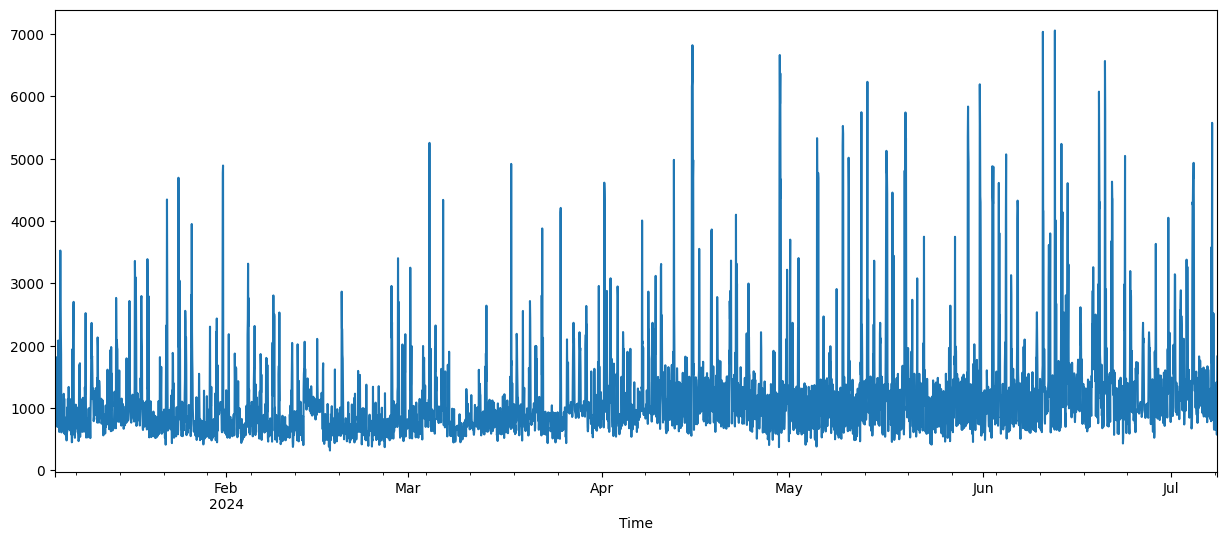

In [84]:
power = df['Total (W)']
power.plot(figsize=(15, 6))
plt.show()

**Drop unnecessary Columns**\
Since we are going to forecast the total load, loads of phase A, B, and C, are not required. Similarly, since we have already extracted the hour from time, the 'Time' column is not required anymore

In [85]:
df.drop(['Time', 'Phase_A (W)', 'Phase_B (W)', 'Phase_C (W)'], axis=1, inplace=True)
df.drop(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'], axis=1, inplace=True)
df

,TOD,Total (W),Holiday,office_day
Time,,,,
2024-01-04 15:00:00,15,821.0,False,True
2024-01-04 16:00:00,16,741.0,False,True
2024-01-04 17:00:00,17,776.0,False,True
2024-01-04 18:00:00,18,1260.0,False,True
2024-01-04 19:00:00,19,973.0,False,True
...,...,...,...,...
2024-07-08 05:00:00,5,1040.0,False,True
2024-07-08 06:00:00,6,1414.0,False,True
2024-07-08 07:00:00,7,571.0,False,True


In [86]:
df['Power (t-1)'] = df['Total (W)'].shift(1)
df['Power (t-2)'] = df['Total (W)'].shift(2)
df.dropna(inplace=True)
df

,TOD,Total (W),Holiday,office_day,Power (t-1),Power (t-2)
Time,,,,,,
2024-01-04 17:00:00,17,776.0,False,True,741.0,821.0
2024-01-04 18:00:00,18,1260.0,False,True,776.0,741.0
2024-01-04 19:00:00,19,973.0,False,True,1260.0,776.0
2024-01-04 20:00:00,20,929.0,False,True,973.0,1260.0
2024-01-04 21:00:00,21,1812.0,False,True,929.0,973.0
...,...,...,...,...,...,...
2024-07-08 05:00:00,5,1040.0,False,True,645.0,1288.0
2024-07-08 06:00:00,6,1414.0,False,True,1040.0,645.0
2024-07-08 07:00:00,7,571.0,False,True,1414.0,1040.0


**Scale the Numerical Attributes**

In [87]:
columns_to_scale = ['TOD', 'Total (W)', 'Power (t-1)', 'Power (t-2)']
scaler = MinMaxScaler(feature_range=(-1, 1))
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])
df

,TOD,Total (W),Holiday,office_day,Power (t-1),Power (t-2)
Time,,,,,,
2024-01-04 17:00:00,0.478261,-0.863461,False,True,-0.873850,-0.850104
2024-01-04 18:00:00,0.565217,-0.719798,False,True,-0.863461,-0.873850
2024-01-04 19:00:00,0.652174,-0.804987,False,True,-0.719798,-0.863461
2024-01-04 20:00:00,0.739130,-0.818047,False,True,-0.804987,-0.719798
2024-01-04 21:00:00,0.826087,-0.555951,False,True,-0.818047,-0.804987
...,...,...,...,...,...,...
2024-07-08 05:00:00,-0.565217,-0.785099,False,True,-0.902345,-0.711487
2024-07-08 06:00:00,-0.478261,-0.674087,False,True,-0.785099,-0.902345
2024-07-08 07:00:00,-0.391304,-0.924310,False,True,-0.674087,-0.785099


**Convert the categorical attributes to numeric**

In [88]:
# df['Friday'] = df['Friday'].astype(np.float32)
# df['Monday'] = df['Monday'].astype(np.float32)
# df['Saturday'] = df['Saturday'].astype(np.float32)
# df['Sunday'] = df['Sunday'].astype(np.float32)
# df['Thursday'] = df['Thursday'].astype(np.float32)
# df['Tuesday'] = df['Tuesday'].astype(np.float32)
# df['Wednesday'] = df['Wednesday'].astype(np.float32)
df['Holiday'] = df['Holiday'].astype(np.float32)
df['office_day'] = df['office_day'].astype(np.float32)
df

,TOD,Total (W),Holiday,office_day,Power (t-1),Power (t-2)
Time,,,,,,
2024-01-04 17:00:00,0.478261,-0.863461,0.0,1.0,-0.873850,-0.850104
2024-01-04 18:00:00,0.565217,-0.719798,0.0,1.0,-0.863461,-0.873850
2024-01-04 19:00:00,0.652174,-0.804987,0.0,1.0,-0.719798,-0.863461
2024-01-04 20:00:00,0.739130,-0.818047,0.0,1.0,-0.804987,-0.719798
2024-01-04 21:00:00,0.826087,-0.555951,0.0,1.0,-0.818047,-0.804987
...,...,...,...,...,...,...
2024-07-08 05:00:00,-0.565217,-0.785099,0.0,1.0,-0.902345,-0.711487
2024-07-08 06:00:00,-0.478261,-0.674087,0.0,1.0,-0.785099,-0.902345
2024-07-08 07:00:00,-0.391304,-0.924310,0.0,1.0,-0.674087,-0.785099


**Separate train and test data**

In [89]:
features = df.drop('Total (W)', axis=1, inplace=False).values
labels = df['Total (W)'].values
labels = labels.reshape(-1, 1)

print(features.shape, labels.shape)

(4457, 5) (4457, 1)


In [90]:
train_size = int(len(df) * 0.8)

features_train, labels_train = features[:train_size], labels[:train_size]
features_test, labels_test = features[train_size:], labels[train_size:]

print(features_train.shape, labels_train.shape)
print(features_test.shape, labels_test.shape)

(3565, 5) (3565, 1)
(892, 5) (892, 1)


**Create sequences**

In [91]:
sequence_length = 6
X_train, y_train = [], []
for i in range(len(features_train)-sequence_length):
  X_train.append(features_train[i:i+sequence_length])
  y_train.append(labels_train[i+1:i+sequence_length+1])

X_train, y_train = np.array(X_train), np.array(y_train)

X_train.shape, y_train.shape

((3559, 6, 5), (3559, 6, 1))

In [92]:
X_test, y_test = [], []
for i in range(len(features_test)-sequence_length):
  X_test.append(features_test[i:i+sequence_length])
  y_test.append(labels_test[i+1:i+sequence_length+1])
X_test, y_test = np.array(X_test), np.array(y_test)

X_test.shape, y_test.shape

((886, 6, 5), (886, 6, 1))

**Convert to Tensors**

In [93]:
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
print(X_train.shape, y_train.shape)

X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)
print(X_test.shape, y_test.shape)

torch.Size([3559, 6, 5]) torch.Size([3559, 6, 1])
torch.Size([886, 6, 5]) torch.Size([886, 6, 1])


**Torch DataLoader**

In [94]:
batch_size = 32
train_dataset = torch.utils.data.TensorDataset(X_train, y_train)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size = batch_size, shuffle=True)

test_dataset = torch.utils.data.TensorDataset(X_test, y_test)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size = batch_size, shuffle=False)

In [95]:
for x, y in train_loader:
	print(f'X shape: {x.shape}, y shape: {y.shape}')
	break

X shape: torch.Size([32, 6, 5]), y shape: torch.Size([32, 6, 1])


# Create Model

In [96]:
class LSTM(nn.Module):
  def __init__(self, input_size, hidden_size, num_layers):
    super(LSTM, self).__init__()
    self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)

  def forward(self, x):
    out, _ = self.lstm(x)
    out = self.fc(out)
    return out

In [97]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cpu


In [98]:
input_size = 5
num_layers = 1
hidden_size = 64
output_size = 1

model = LSTM(input_size, hidden_size, num_layers).to(device)
loss_fn = torch.nn.MSELoss(reduction='mean')

optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
print(model)

LSTM(
  (lstm): LSTM(5, 64, batch_first=True)
  (fc): Linear(in_features=64, out_features=1, bias=True)
)


# Train the Model

In [99]:
num_epochs = 50
train_loss_hist =[]
test_loss_hist =[]
train_mape_hist = []
test_mape_hist = []

for epoch in range(num_epochs):
  total_loss = 0.0
  total_mape = 0.0

  model.train()
  for batch_X, batch_y in train_loader:
    batch_X, batch_y = batch_X.to(device), batch_y.to(device)
    predictions = model(batch_X)
    loss = loss_fn(predictions, batch_y)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    total_loss += loss.item()
    total_mape += torch.mean(torch.abs((predictions - batch_y)/(batch_y+1e-8))*100.0)

  average_loss = total_loss / len(train_loader)
  train_loss_hist.append(average_loss)
  average_mape = total_mape / (len(train_loader))
  train_mape_hist.append(average_mape)

  # Validation on test data
  model.eval()
  with torch.no_grad():
    total_test_loss = 0.0
    total_test_mape = 0.0

    for batch_X_test, batch_y_test in test_loader:
      batch_X_test, batch_y_test = batch_X_test.to(device), batch_y_test.to(device)
      predictions_test = model(batch_X_test)
      test_loss = loss_fn(predictions_test, batch_y_test)

      total_test_loss += test_loss.item()
      total_test_mape += torch.mean(torch.abs((predictions_test - batch_y_test)/(batch_y_test+1e-8))*100.0)

    average_test_loss = total_test_loss / len(test_loader)
    test_loss_hist.append(average_test_loss)
    average_test_mape = total_test_mape / (len(test_loader))
    test_mape_hist.append(average_test_mape)

    print(f'Epoch [{epoch+1}/{num_epochs}] - Training Loss: {average_loss:.4f}, Test Loss: {average_test_loss:.4f}')

Epoch [1/50] - Training Loss: 0.0991, Test Loss: 0.0736
Epoch [2/50] - Training Loss: 0.0429, Test Loss: 0.0676
Epoch [3/50] - Training Loss: 0.0379, Test Loss: 0.0653
Epoch [4/50] - Training Loss: 0.0370, Test Loss: 0.0646
Epoch [5/50] - Training Loss: 0.0361, Test Loss: 0.0633
Epoch [6/50] - Training Loss: 0.0356, Test Loss: 0.0593
Epoch [7/50] - Training Loss: 0.0352, Test Loss: 0.0574
Epoch [8/50] - Training Loss: 0.0329, Test Loss: 0.0564
Epoch [9/50] - Training Loss: 0.0327, Test Loss: 0.0570
Epoch [10/50] - Training Loss: 0.0322, Test Loss: 0.0560
Epoch [11/50] - Training Loss: 0.0318, Test Loss: 0.0556
Epoch [12/50] - Training Loss: 0.0315, Test Loss: 0.0525
Epoch [13/50] - Training Loss: 0.0316, Test Loss: 0.0538
Epoch [14/50] - Training Loss: 0.0309, Test Loss: 0.0516
Epoch [15/50] - Training Loss: 0.0305, Test Loss: 0.0515
Epoch [16/50] - Training Loss: 0.0304, Test Loss: 0.0506
Epoch [17/50] - Training Loss: 0.0303, Test Loss: 0.0501
Epoch [18/50] - Training Loss: 0.0299, T

In [100]:
train_mape_hist

[tensor(43.5237, grad_fn=<DivBackward0>),
 tensor(33.7939, grad_fn=<DivBackward0>),
 tensor(32.6699, grad_fn=<DivBackward0>),
 tensor(32.2688, grad_fn=<DivBackward0>),
 tensor(31.9215, grad_fn=<DivBackward0>),
 tensor(31.7068, grad_fn=<DivBackward0>),
 tensor(31.1036, grad_fn=<DivBackward0>),
 tensor(30.1471, grad_fn=<DivBackward0>),
 tensor(29.9126, grad_fn=<DivBackward0>),
 tensor(29.6604, grad_fn=<DivBackward0>),
 tensor(29.3768, grad_fn=<DivBackward0>),
 tensor(29.1451, grad_fn=<DivBackward0>),
 tensor(29.0626, grad_fn=<DivBackward0>),
 tensor(28.8617, grad_fn=<DivBackward0>),
 tensor(28.5294, grad_fn=<DivBackward0>),
 tensor(28.4121, grad_fn=<DivBackward0>),
 tensor(28.4382, grad_fn=<DivBackward0>),
 tensor(28.1694, grad_fn=<DivBackward0>),
 tensor(28.1107, grad_fn=<DivBackward0>),
 tensor(27.9910, grad_fn=<DivBackward0>),
 tensor(28.1771, grad_fn=<DivBackward0>),
 tensor(27.8726, grad_fn=<DivBackward0>),
 tensor(27.8473, grad_fn=<DivBackward0>),
 tensor(27.9254, grad_fn=<DivBackw

In [101]:
test_mape_hist

[tensor(94.0867),
 tensor(92.7675),
 tensor(90.9770),
 tensor(90.2613),
 tensor(88.4338),
 tensor(83.7740),
 tensor(82.3889),
 tensor(79.9658),
 tensor(80.4946),
 tensor(79.9615),
 tensor(80.1485),
 tensor(75.7101),
 tensor(75.7251),
 tensor(74.8287),
 tensor(74.4982),
 tensor(72.8647),
 tensor(73.0832),
 tensor(75.6788),
 tensor(70.7231),
 tensor(71.2087),
 tensor(67.3073),
 tensor(72.4136),
 tensor(73.1433),
 tensor(72.3223),
 tensor(71.6178),
 tensor(72.4735),
 tensor(74.9248),
 tensor(66.7356),
 tensor(73.1614),
 tensor(71.9601),
 tensor(73.2625),
 tensor(67.5809),
 tensor(69.6550),
 tensor(66.7610),
 tensor(69.1613),
 tensor(68.7854),
 tensor(67.8831),
 tensor(67.6035),
 tensor(69.5157),
 tensor(71.1205),
 tensor(70.9883),
 tensor(65.6519),
 tensor(65.7081),
 tensor(66.5394),
 tensor(66.8298),
 tensor(67.1848),
 tensor(68.2281),
 tensor(69.7337),
 tensor(66.8042),
 tensor(69.3996)]

# Plots

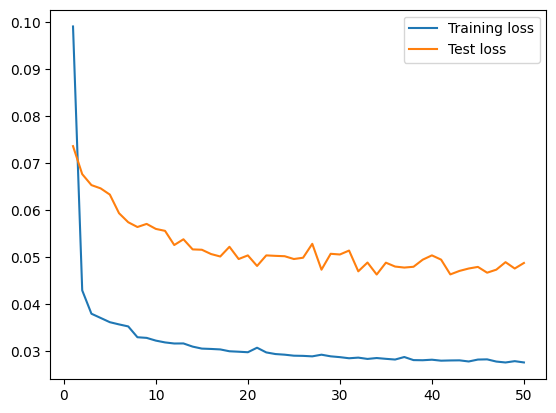

In [102]:
x = np.linspace(1,num_epochs,num_epochs)
plt.plot(x,train_loss_hist,scalex=True, label="Training loss")
plt.plot(x, test_loss_hist, label="Test loss")
plt.legend()
plt.show()